Imports

In [201]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [202]:
# from google.colab import drive
# drive.mount('/content/drive')
# filePath = "/content/drive/MyDrive/Colab Notebooks/UnSupervised"
filePath = "."

# Part A

1.A.

In [203]:
carname_csv = pd.read_csv(filePath + "/Car name.csv")
carname_csv

,car_name
0,chevrolet chevelle malibu
1,buick skylark 320
2,plymouth satellite
3,amc rebel sst
4,ford torino
...,...
393,ford mustang gl
394,vw pickup
395,dodge rampage
396,ford ranger


1.B.

In [204]:
carattributes_json = pd.read_json(filePath + "/Car-Attributes.json")
carattributes_json

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130,3504,12.0,70,1
1,15.0,8,350.0,165,3693,11.5,70,1
2,18.0,8,318.0,150,3436,11.0,70,1
3,16.0,8,304.0,150,3433,12.0,70,1
4,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1
394,44.0,4,97.0,52,2130,24.6,82,2
395,32.0,4,135.0,84,2295,11.6,82,1
396,28.0,4,120.0,79,2625,18.6,82,1


1.C.

In [205]:
cols = np.concatenate((carname_csv.columns, carattributes_json.columns))
cols

array(['car_name', 'mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr',
       'origin'], dtype=object)

In [206]:
df = pd.concat([carname_csv, carattributes_json], axis=1)
df

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79,2625,18.6,82,1


1.D.

In [207]:
df.describe()

,mpg,cyl,disp,wt,acc,yr,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,5140.000000,24.800000,82.000000,3.000000


Insights:  
mpg:
- Mean and Median are nearly equal.
- Distribution might be normal.
- 75 % of values are less than 29 and maxiumum value is 46

cyl:
- Standard deviation is nearly 2. with mean of 5.4.
- Most of the vichle can be 4 cylinder
- Max value for cyl is 8.

disp:
- Mean is greater than Median so there might be right skewness in the data.
- 75% of values are less than 262 but maximum value is 455 which is almost double so there can be outliers in the data.

wt:
- Mean and Median are nearly equal.
- Distribution might be normal

acc:
- Mean and Median are nearly equal
- Distribution might be normal.

yr:
- Mean and Median are nearly equal
- Distribution might be normal.

origin:
- Mean is close to 1
- Most of the origin can be 1

2.A.

In [208]:
df.isnull().sum()

car_name    0
mpg         0
cyl         0
disp        0
hp          0
wt          0
acc         0
yr          0
origin      0
dtype: int64

In [209]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    object 
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 28.1+ KB


all the data are numerial either int or float except
- car_name which is name/string hence Dtype is object
- hp which shows as an object

In [210]:
df['hp'].unique()

array([130, 165, 150, 140, 198, 220, 215, 225, 190, 170, 160, 95, 97, 85,
       88, 46, 87, 90, 113, 200, 210, 193, '?', 100, 105, 175, 153, 180,
       110, 72, 86, 70, 76, 65, 69, 60, 80, 54, 208, 155, 112, 92, 145,
       137, 158, 167, 94, 107, 230, 49, 75, 91, 122, 67, 83, 78, 52, 61,
       93, 148, 129, 96, 71, 98, 115, 53, 81, 79, 120, 152, 102, 108, 68,
       58, 149, 89, 63, 48, 66, 139, 103, 125, 133, 138, 135, 142, 77, 62,
       132, 84, 64, 74, 116, 82], dtype=object)

We can see there is a non integer value as -> '?'

In [211]:
median_val = pd.to_numeric(df['hp'], errors='coerce').median()
median_val

93.5

In [212]:
df.hp = df['hp'].apply(pd.to_numeric, errors = 'coerce')

In [213]:
missing_data = df.hp.isnull().sum()
missing_data

6

In [214]:
missingPercentage = (missing_data * 100)/df.hp.count()
print('percentage of missing data is ', missingPercentage)

percentage of missing data is  1.530612244897959


In [215]:
df.hp.unique()

array([130., 165., 150., 140., 198., 220., 215., 225., 190., 170., 160.,
        95.,  97.,  85.,  88.,  46.,  87.,  90., 113., 200., 210., 193.,
        nan, 100., 105., 175., 153., 180., 110.,  72.,  86.,  70.,  76.,
        65.,  69.,  60.,  80.,  54., 208., 155., 112.,  92., 145., 137.,
       158., 167.,  94., 107., 230.,  49.,  75.,  91., 122.,  67.,  83.,
        78.,  52.,  61.,  93., 148., 129.,  96.,  71.,  98., 115.,  53.,
        81.,  79., 120., 152., 102., 108.,  68.,  58., 149.,  89.,  63.,
        48.,  66., 139., 103., 125., 133., 138., 135., 142.,  77.,  62.,
       132.,  84.,  64.,  74., 116.,  82.])

In [216]:
df['hp'].fillna(median_val, inplace=True)

In [217]:
df.hp.unique()

array([130. , 165. , 150. , 140. , 198. , 220. , 215. , 225. , 190. ,
       170. , 160. ,  95. ,  97. ,  85. ,  88. ,  46. ,  87. ,  90. ,
       113. , 200. , 210. , 193. ,  93.5, 100. , 105. , 175. , 153. ,
       180. , 110. ,  72. ,  86. ,  70. ,  76. ,  65. ,  69. ,  60. ,
        80. ,  54. , 208. , 155. , 112. ,  92. , 145. , 137. , 158. ,
       167. ,  94. , 107. , 230. ,  49. ,  75. ,  91. , 122. ,  67. ,
        83. ,  78. ,  52. ,  61. ,  93. , 148. , 129. ,  96. ,  71. ,
        98. , 115. ,  53. ,  81. ,  79. , 120. , 152. , 102. , 108. ,
        68. ,  58. , 149. ,  89. ,  63. ,  48. ,  66. , 139. , 103. ,
       125. , 133. , 138. , 135. , 142. ,  77. ,  62. , 132. ,  84. ,
        64. ,  74. , 116. ,  82. ])

In [218]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   car_name  398 non-null    object 
 1   mpg       398 non-null    float64
 2   cyl       398 non-null    int64  
 3   disp      398 non-null    float64
 4   hp        398 non-null    float64
 5   wt        398 non-null    int64  
 6   acc       398 non-null    float64
 7   yr        398 non-null    int64  
 8   origin    398 non-null    int64  
dtypes: float64(4), int64(4), object(1)
memory usage: 28.1+ KB


2.B.

In [219]:
df.duplicated().sum()

0

Whole row is not duplicated as such, car_name has to be unique as each row represents different cars. 

In [220]:
df[df.duplicated(['car_name'])].sort_values(["car_name"])
df

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1


In [221]:
df = df.drop_duplicates(['car_name'])

In [222]:
# Dataframe after removing duplicates
df

,car_name,mpg,cyl,disp,hp,wt,acc,yr,origin
0,chevrolet chevelle malibu,18.0,8,307.0,130.0,3504,12.0,70,1
1,buick skylark 320,15.0,8,350.0,165.0,3693,11.5,70,1
2,plymouth satellite,18.0,8,318.0,150.0,3436,11.0,70,1
3,amc rebel sst,16.0,8,304.0,150.0,3433,12.0,70,1
4,ford torino,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...,...
393,ford mustang gl,27.0,4,140.0,86.0,2790,15.6,82,1
394,vw pickup,44.0,4,97.0,52.0,2130,24.6,82,2
395,dodge rampage,32.0,4,135.0,84.0,2295,11.6,82,1
396,ford ranger,28.0,4,120.0,79.0,2625,18.6,82,1


2.C.

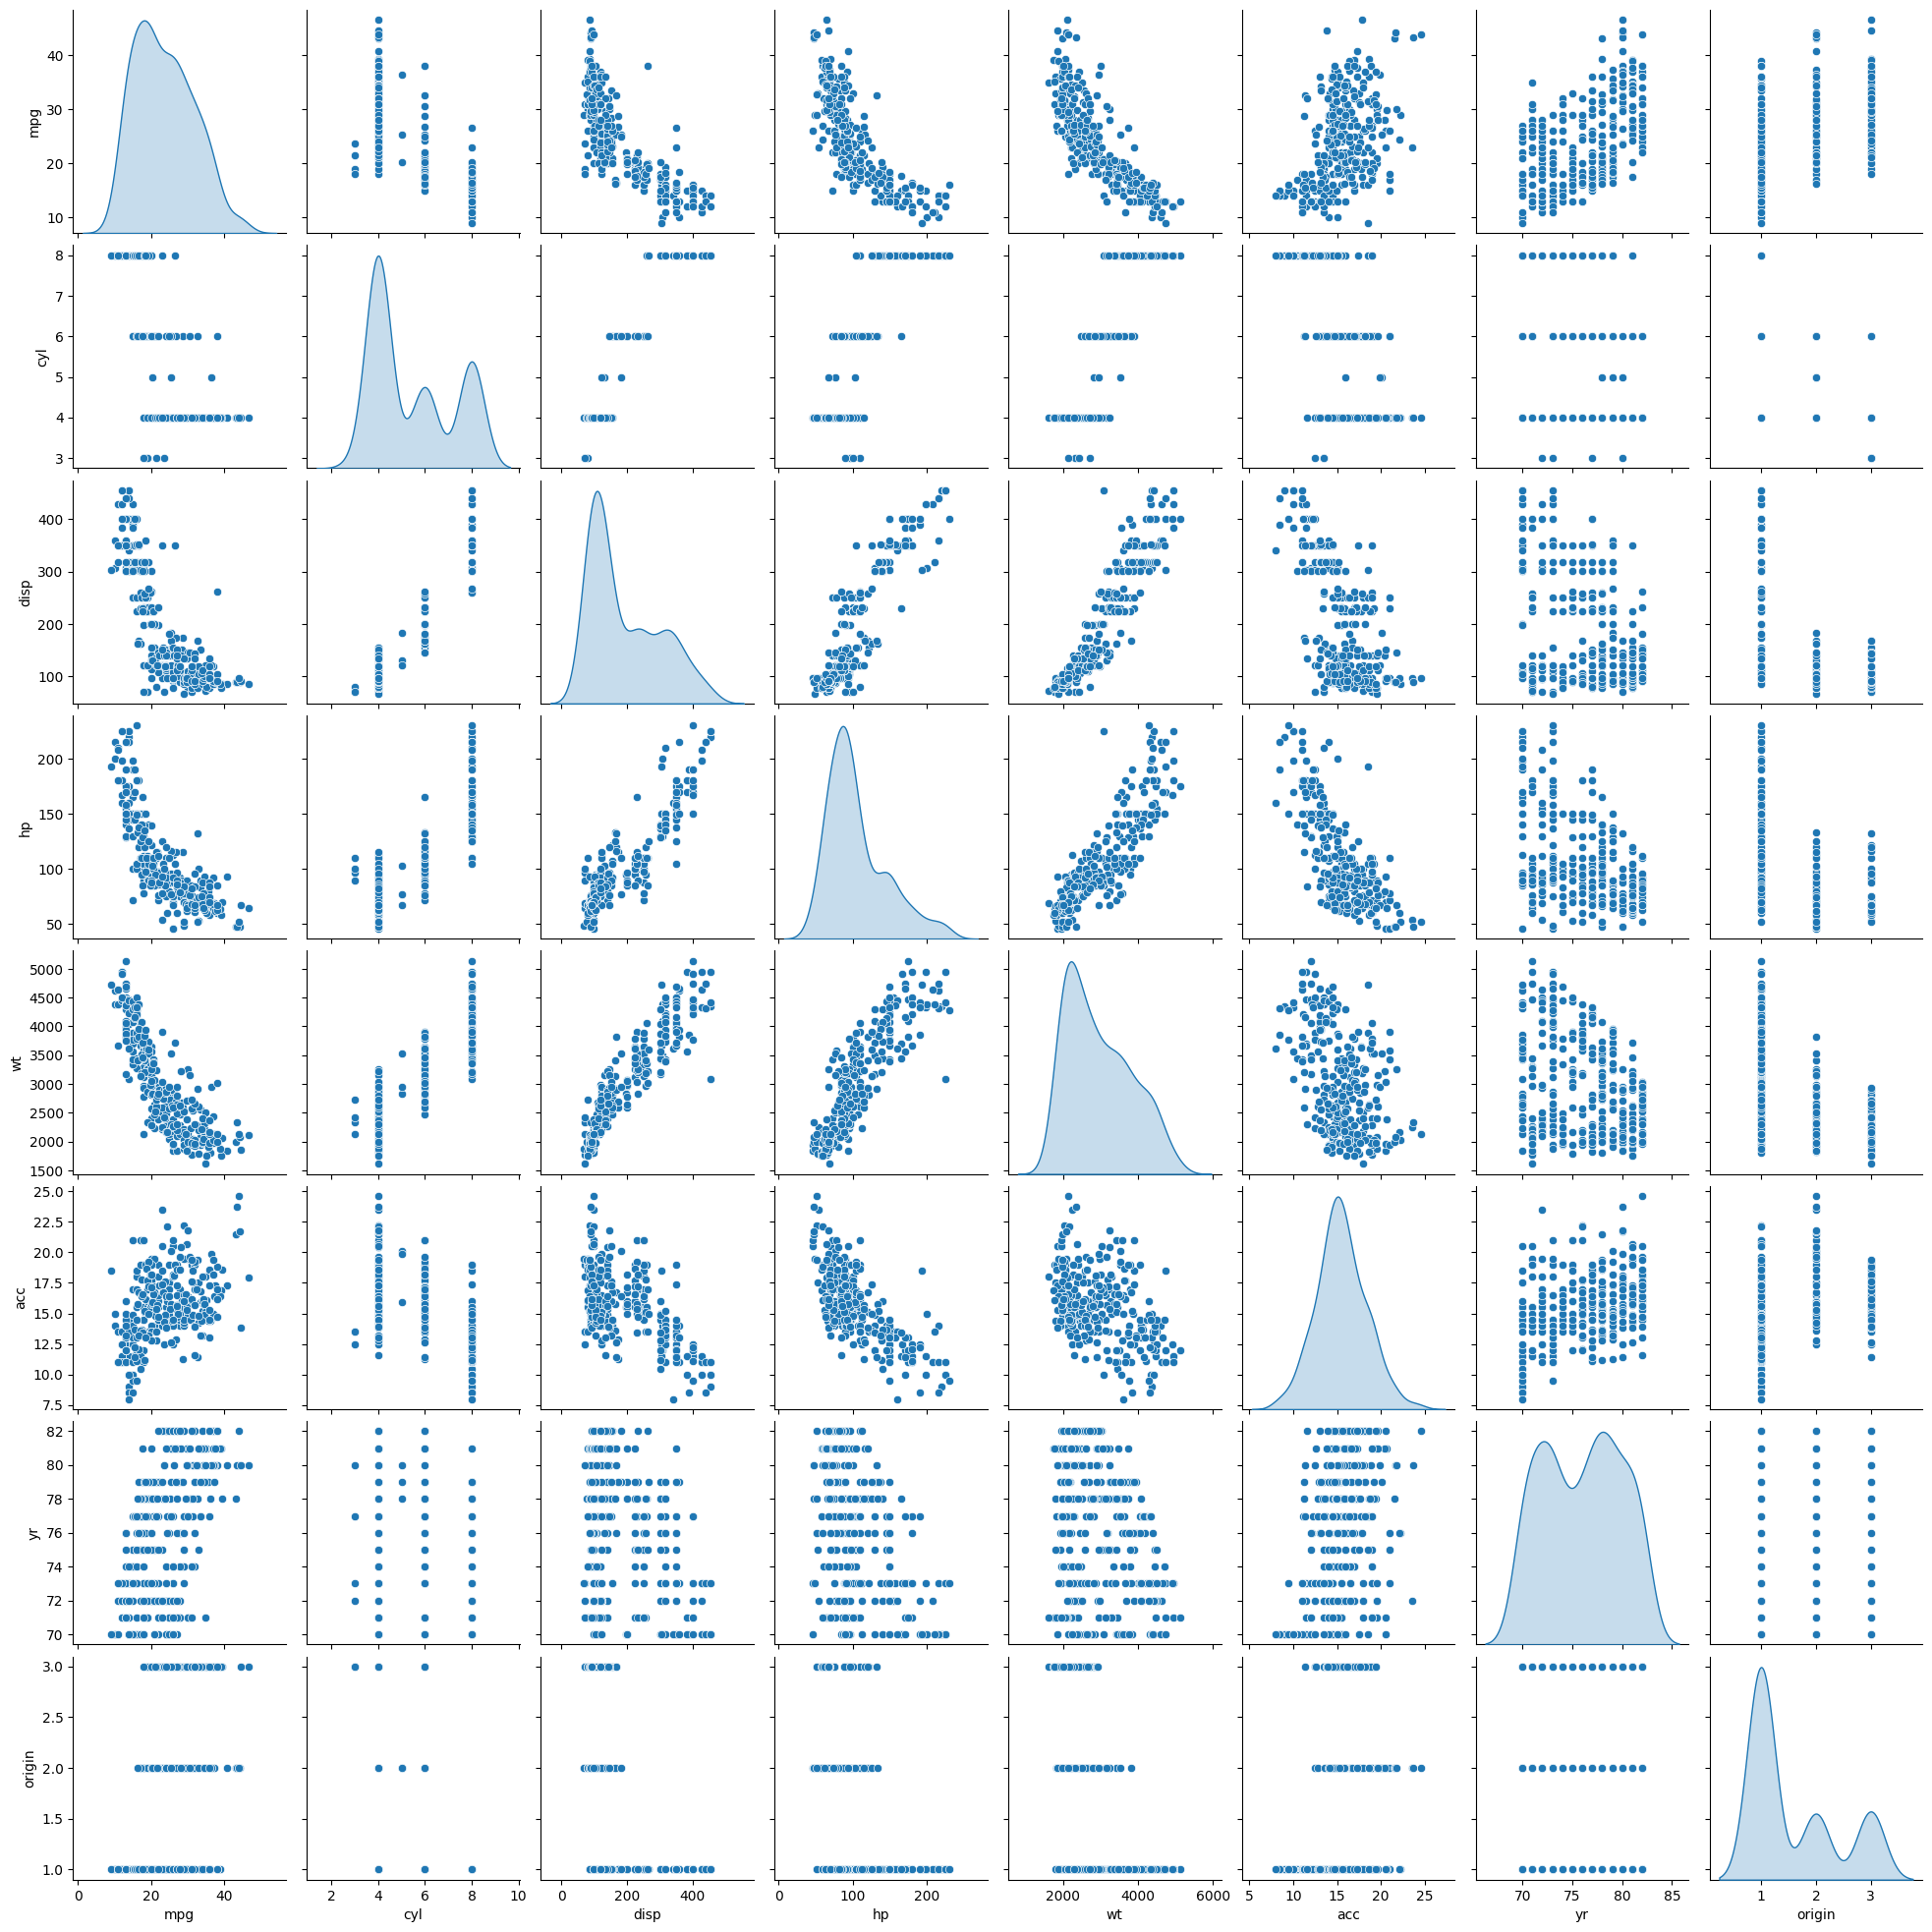

In [223]:
sns.pairplot(df[df.columns], diag_kind="kde")

2.D.

<AxesSubplot: xlabel='wt', ylabel='disp'>

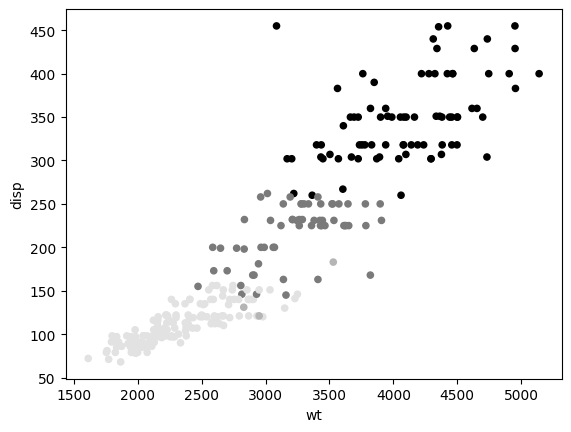

In [224]:
# scatter plots
df.plot.scatter(x='wt', y='disp', c=df.cyl)

2.E.

- with number of cyl both weight and disp tends to increase.
- disp and wt seems to be correlated

2.F.

<AxesSubplot: xlabel='wt', ylabel='mpg'>

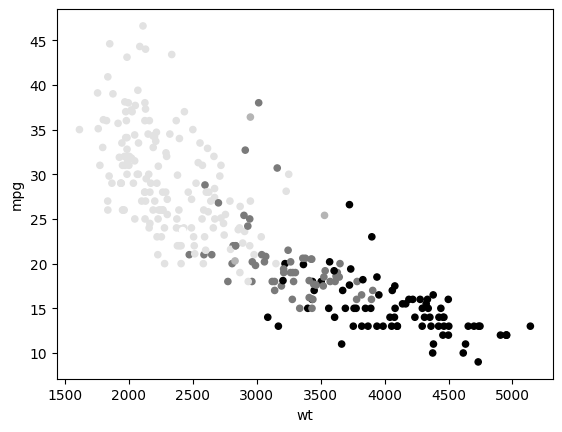

In [225]:
# scatter plots
df.plot.scatter(x='wt', y='mpg', c=df.cyl)

2.G.

- with number of cyl weight tends to be high
- with hight number of cyl the mgp tends to decrease.
- mpg is inversly proportional to wt

2.H.

In [226]:
df.columns

Index(['car_name', 'mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'yr', 'origin'], dtype='object')

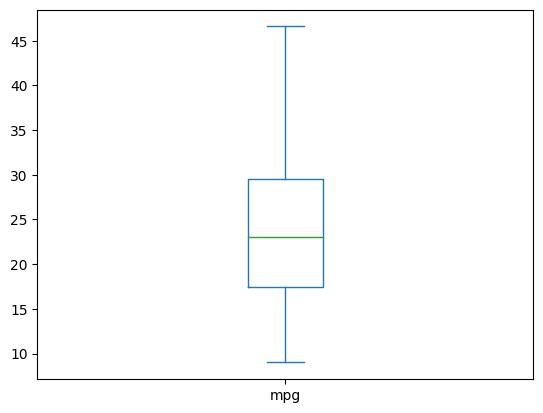

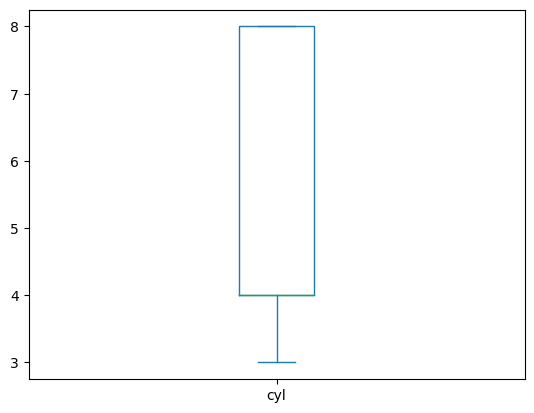

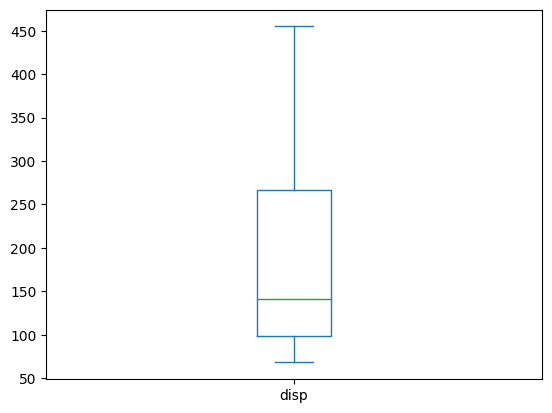

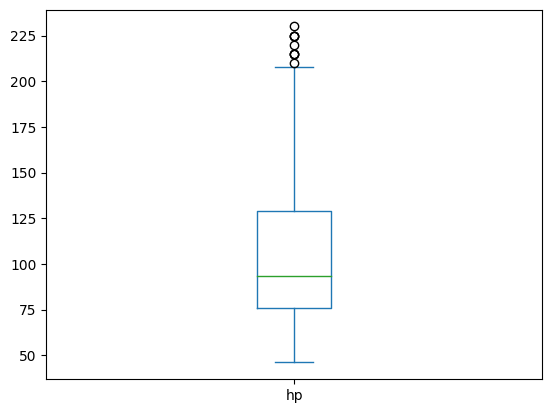

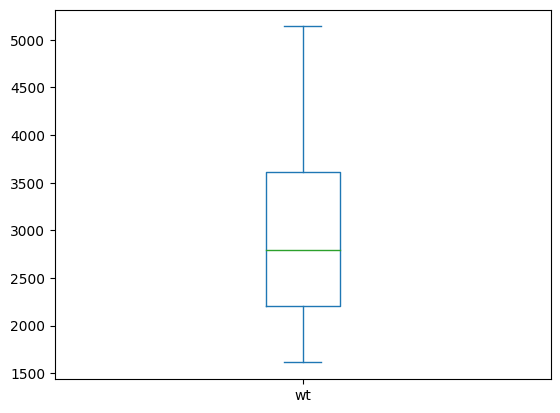

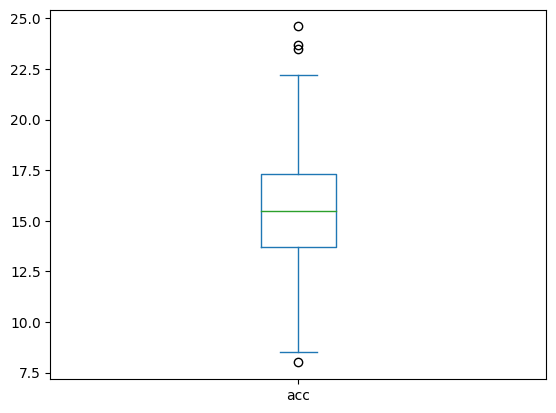

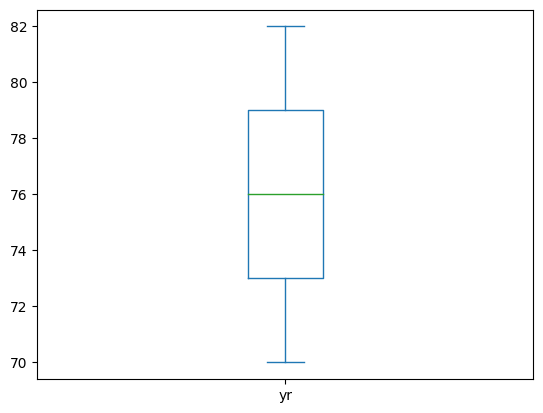

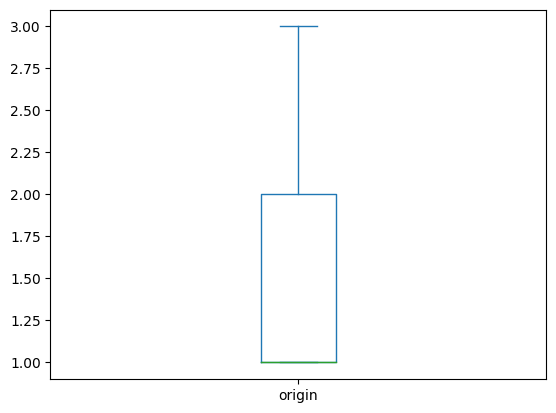

In [227]:
for i, item in enumerate(df.columns.drop("car_name")):
    df[item].plot(kind='box')
    plt.show()

From box plots
- hp has few outliers which can be unexpected values
- acc also has outliers which can be unexpected values

3.A.

In [228]:
# taking only numerical columns
dfNum = df.iloc[:,1:]
dfNum

,mpg,cyl,disp,hp,wt,acc,yr,origin
0,18.0,8,307.0,130.0,3504,12.0,70,1
1,15.0,8,350.0,165.0,3693,11.5,70,1
2,18.0,8,318.0,150.0,3436,11.0,70,1
3,16.0,8,304.0,150.0,3433,12.0,70,1
4,17.0,8,302.0,140.0,3449,10.5,70,1
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,1
394,44.0,4,97.0,52.0,2130,24.6,82,2
395,32.0,4,135.0,84.0,2295,11.6,82,1
396,28.0,4,120.0,79.0,2625,18.6,82,1


In [229]:
from scipy.stats import zscore

In [230]:
# dropping categorical columns and scaling the data
dfNum_wo_cat = dfNum.drop(columns=['cyl', 'origin', 'yr'], axis=1, inplace=False)
dfNum_wo_cat_scaled = dfNum_wo_cat.apply(zscore)

In [231]:
clusters = range(2,10)
meanDistortions=[]

In [232]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist

In [233]:
data_orig = dfNum_wo_cat
data = dfNum_wo_cat_scaled

for k in clusters:
    model=KMeans(n_clusters=k)
    model.fit(data)
    prediction=model.predict(data)
    meanDistortions.append(sum(np.min(cdist(data, model.cluster_centers_, 'euclidean'), axis=1)) / data.shape[0])

3.B.

In [234]:
meanDistortions

[1.3284048667722306,
 1.0939186845592157,
 0.9743620870758961,
 0.8863391040775184,
 0.8200972254787742,
 0.7809632903040322,
 0.7539324675092938,
 0.7261032241852532]

Text(0.5, 0, 'k')

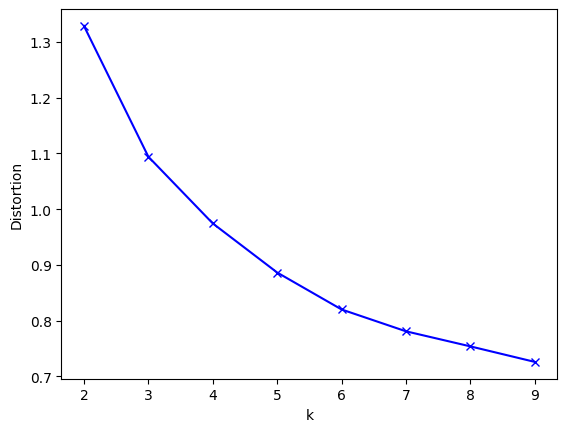

In [235]:
plt.plot(clusters, meanDistortions, 'bx-')
plt.ylabel('Distortion')
plt.xlabel('k')

3.C.

- the elbow plot appears to be at K = 3 and 6
- let choose K = 3 for the no. of clusters.

3.D.

In [236]:
k_val = 3
final_model = KMeans(k_val)
final_model.fit(data)
labels = final_model.fit_predict(data)
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 1, 1, 2, 2,
       1, 2, 2, 0, 0, 0, 0, 1, 2, 1, 2, 2, 2, 0, 0, 0, 0, 2, 2, 2, 2, 2,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0,
       2, 2, 2, 1, 2, 1, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2,
       1, 0, 0, 0, 2, 2, 2, 2, 1, 0, 0, 1, 1, 2, 2, 0, 2, 2, 0, 2, 1, 2,
       2, 0, 0, 1, 1, 1, 1, 1, 2, 1, 1, 2, 2, 0, 0, 2, 2, 2, 2, 2, 0, 1,
       2, 1, 2, 2, 1, 1, 2, 1, 0, 1, 1, 1, 2, 2, 2, 2, 1, 2, 0, 2, 0, 0,
       0, 0, 1, 1, 1, 2, 1, 2, 0, 0, 2, 2, 2, 2, 0, 0, 0, 0, 1, 2, 1, 2,
       1, 1, 2, 2, 2, 1, 1, 1, 1, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       0, 0, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 2, 2, 2, 0, 0, 0,
       2, 0, 1, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 1, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 2, 2, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 1, 1, 2, 2,

3.E.

In [237]:
# Adding a feature from prediction 
data["LABEL"] = labels
data_orig["LABEL"] = labels
data

,mpg,disp,hp,wt,acc,LABEL
0,-0.705535,1.068125,0.610803,0.634392,-1.233847,0
1,-1.078909,1.470118,1.484548,0.855203,-1.410326,0
2,-0.705535,1.170960,1.110086,0.554946,-1.586805,0
3,-0.954451,1.040079,1.110086,0.551441,-1.233847,0
4,-0.829993,1.021381,0.860445,0.570134,-1.763284,0
...,...,...,...,...,...,...
393,0.414588,-0.493104,-0.487619,-0.199786,0.036800,2
394,2.530377,-0.895098,-1.336400,-0.970874,3.213419,1
395,1.036879,-0.539848,-0.537548,-0.778102,-1.375030,1
396,0.539047,-0.680078,-0.662368,-0.392558,1.095673,1


3.E.

In [238]:
print(data)
print(data_orig)

          mpg      disp        hp        wt       acc  LABEL
0   -0.705535  1.068125  0.610803  0.634392 -1.233847      0
1   -1.078909  1.470118  1.484548  0.855203 -1.410326      0
2   -0.705535  1.170960  1.110086  0.554946 -1.586805      0
3   -0.954451  1.040079  1.110086  0.551441 -1.233847      0
4   -0.829993  1.021381  0.860445  0.570134 -1.763284      0
..        ...       ...       ...       ...       ...    ...
393  0.414588 -0.493104 -0.487619 -0.199786  0.036800      2
394  2.530377 -0.895098 -1.336400 -0.970874  3.213419      1
395  1.036879 -0.539848 -0.537548 -0.778102 -1.375030      1
396  0.539047 -0.680078 -0.662368 -0.392558  1.095673      1
397  0.912421 -0.689427 -0.587476 -0.281568  1.378039      1

[305 rows x 6 columns]
      mpg   disp     hp    wt   acc  LABEL
0    18.0  307.0  130.0  3504  12.0      0
1    15.0  350.0  165.0  3693  11.5      0
2    18.0  318.0  150.0  3436  11.0      0
3    16.0  304.0  150.0  3433  12.0      0
4    17.0  302.0  140.0  3449

<AxesSubplot: xlabel='acc', ylabel='mpg'>

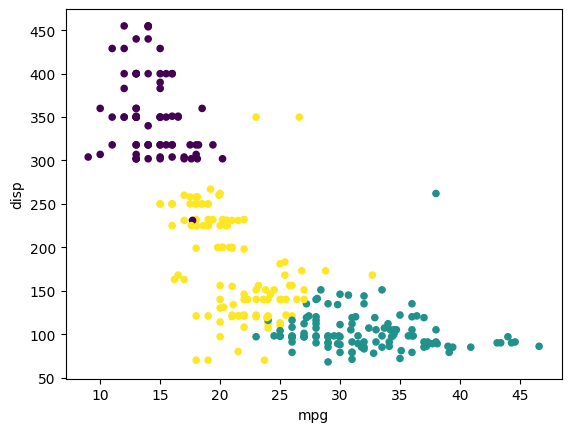

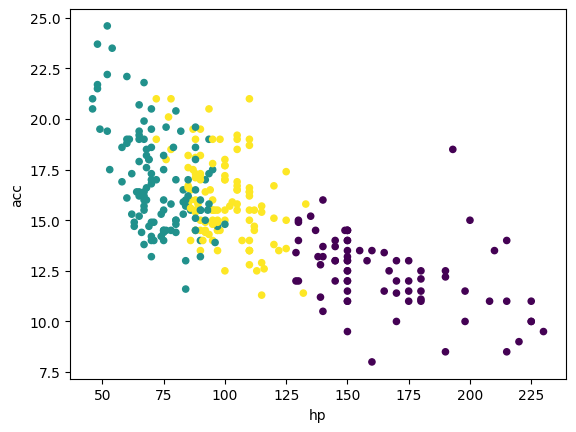

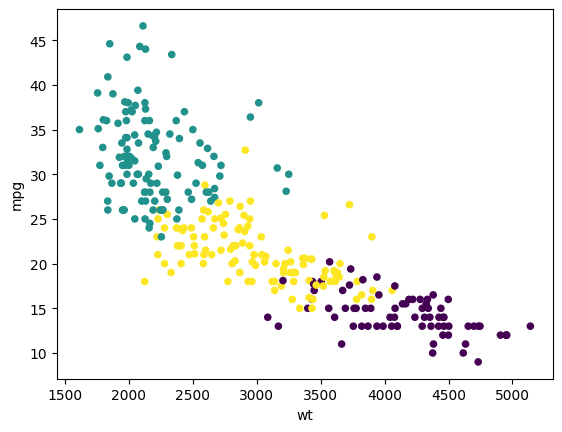

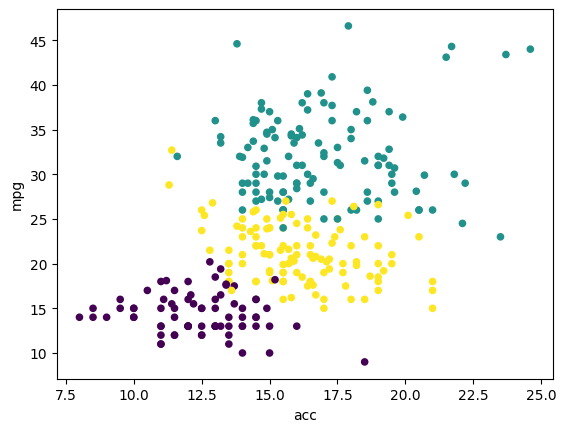

In [239]:
data_orig.plot.scatter(x="mpg", y="disp", c=final_model.labels_.astype(float))
data_orig.plot.scatter(x="hp", y="acc", c=final_model.labels_.astype(float))
data_orig.plot.scatter(x="wt", y="mpg", c=final_model.labels_.astype(float))
data_orig.plot.scatter(x="acc", y="mpg", c=final_model.labels_.astype(float))

boxplot

array([[<AxesSubplot: title={'center': 'acc'}, xlabel='[LABEL]'>,
        <AxesSubplot: title={'center': 'disp'}, xlabel='[LABEL]'>,
        <AxesSubplot: title={'center': 'hp'}, xlabel='[LABEL]'>,
        <AxesSubplot: title={'center': 'mpg'}, xlabel='[LABEL]'>],
       [<AxesSubplot: title={'center': 'wt'}, xlabel='[LABEL]'>,
        <AxesSubplot: >, <AxesSubplot: >, <AxesSubplot: >]], dtype=object)

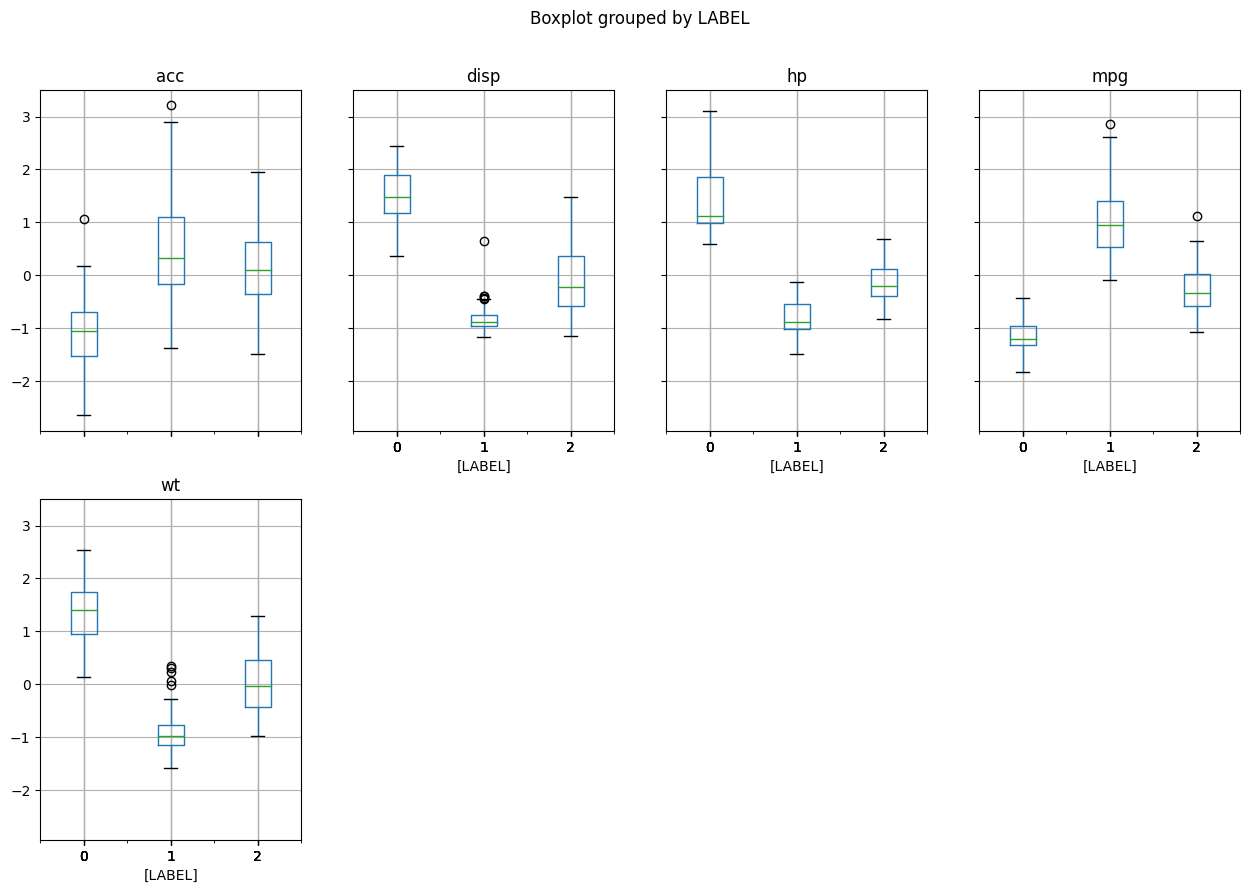

In [240]:
data.boxplot(by="LABEL", layout=(2,4), figsize=(15,10))

3.G.

In [241]:
randomData = pd.DataFrame([[27.0, 140.0, 86.0, 2790, 15.6]], columns=['mpg', 'disp', 'hp', 'wt', 'acc'])
randomData

,mpg,disp,hp,wt,acc
0,27.0,140.0,86.0,2790,15.6


In [242]:
ans = final_model.predict(randomData)
print(ans)

[0]


# Part B

1.A.

In [243]:
vichle_csv = pd.read_csv(filePath + "/vehicle.csv")
vichle_csv

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93,39.0,87.0,183.0,64.0,8,169.0,40.0,20.0,134,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195,car
842,89,46.0,84.0,163.0,66.0,11,159.0,43.0,20.0,159,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197,van
843,106,54.0,101.0,222.0,67.0,12,222.0,30.0,25.0,173,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201,car
844,86,36.0,78.0,146.0,58.0,7,135.0,50.0,18.0,124,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195,car


1.B.

In [244]:
vichle_csv.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

All data are number, as float or int

Missing values

In [245]:
vichle_csv.isna().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [246]:
missing_data_count = vichle_csv.isna().sum().sum()
missing_data_count

41

In [247]:
# percentage of total missing data
total_missing_percentage = (missing_data_count * 100) / (vichle_csv.shape[0] * vichle_csv.shape[1])
print("percentage of total missing data : ", total_missing_percentage)

percentage of total missing data :  0.255070299863133


In [248]:
# percentage of missing data row wise
missing_data_count = (vichle_csv[vichle_csv.isna().any(axis=1)].shape[0] * 100)/vichle_csv.shape[0]
print("percentage of missing data row wise : ", missing_data_count)

percentage of missing data row wise :  3.900709219858156


In [249]:
from sklearn.impute import SimpleImputer

In [250]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median')

In [251]:
imputed_data = imputer.fit_transform(vichle_csv.iloc[:,:18])
data = pd.DataFrame(imputed_data, columns = vichle_csv.columns[:18] )
data

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39.0,87.0,183.0,64.0,8.0,169.0,40.0,20.0,134.0,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195.0
842,89.0,46.0,84.0,163.0,66.0,11.0,159.0,43.0,20.0,159.0,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197.0
843,106.0,54.0,101.0,222.0,67.0,12.0,222.0,30.0,25.0,173.0,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201.0
844,86.0,36.0,78.0,146.0,58.0,7.0,135.0,50.0,18.0,124.0,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195.0


In [252]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    float64
 1   circularity                  846 non-null    float64
 2   distance_circularity         846 non-null    float64
 3   radius_ratio                 846 non-null    float64
 4   pr.axis_aspect_ratio         846 non-null    float64
 5   max.length_aspect_ratio      846 non-null    float64
 6   scatter_ratio                846 non-null    float64
 7   elongatedness                846 non-null    float64
 8   pr.axis_rectangularity       846 non-null    float64
 9   max.length_rectangularity    846 non-null    float64
 10  scaled_variance              846 non-null    float64
 11  scaled_variance.1            846 non-null    float64
 12  scaled_radius_of_gyration    846 non-null    float64
 13  scaled_radius_of_gyr

In [253]:
data.isna().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
dtype: int64

Data is clean now with no missing values

1.C.

<AxesSubplot: ylabel='class'>

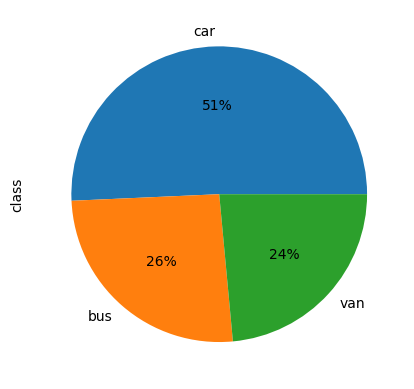

In [254]:
vichle_csv['class'].value_counts().plot(kind='pie', autopct='%1.0f%%')

1.D.

In [255]:
data

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39.0,87.0,183.0,64.0,8.0,169.0,40.0,20.0,134.0,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195.0
842,89.0,46.0,84.0,163.0,66.0,11.0,159.0,43.0,20.0,159.0,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197.0
843,106.0,54.0,101.0,222.0,67.0,12.0,222.0,30.0,25.0,173.0,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201.0
844,86.0,36.0,78.0,146.0,58.0,7.0,135.0,50.0,18.0,124.0,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195.0


In [256]:
data.duplicated().sum()

0

There are no duplicates

In [257]:
data.insert( len(data.columns), 'class', vichle_csv['class'])

In [258]:
data

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95.0,48.0,83.0,178.0,72.0,10.0,162.0,42.0,20.0,159.0,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197.0,van
1,91.0,41.0,84.0,141.0,57.0,9.0,149.0,45.0,19.0,143.0,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199.0,van
2,104.0,50.0,106.0,209.0,66.0,10.0,207.0,32.0,23.0,158.0,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196.0,car
3,93.0,41.0,82.0,159.0,63.0,9.0,144.0,46.0,19.0,143.0,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207.0,van
4,85.0,44.0,70.0,205.0,103.0,52.0,149.0,45.0,19.0,144.0,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183.0,bus
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
841,93.0,39.0,87.0,183.0,64.0,8.0,169.0,40.0,20.0,134.0,200.0,422.0,149.0,72.0,7.0,25.0,188.0,195.0,car
842,89.0,46.0,84.0,163.0,66.0,11.0,159.0,43.0,20.0,159.0,173.0,368.0,176.0,72.0,1.0,20.0,186.0,197.0,van
843,106.0,54.0,101.0,222.0,67.0,12.0,222.0,30.0,25.0,173.0,228.0,721.0,200.0,70.0,3.0,4.0,187.0,201.0,car
844,86.0,36.0,78.0,146.0,58.0,7.0,135.0,50.0,18.0,124.0,155.0,270.0,148.0,66.0,0.0,25.0,190.0,195.0,car


2.A.

In [259]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [260]:
predictor = data.drop('class', axis=1)
target = data['class']

In [261]:
X_train, X_test, y_train, y_test = train_test_split(predictor, target, test_size=0.30, random_state=0)
print(X_train, X_test)

     compactness  circularity  distance_circularity  radius_ratio  \
775         97.0         38.0                  75.0         188.0   
242         85.0         42.0                  59.0         132.0   
301         93.0         43.0                  78.0         166.0   
170        108.0         51.0                 103.0         197.0   
187         98.0         45.0                  76.0         166.0   
..           ...          ...                   ...           ...   
835        111.0         58.0                 105.0         183.0   
192         93.0         43.0                  76.0         149.0   
629         90.0         42.0                  63.0         144.0   
559        101.0         56.0                 101.0         231.0   
684         99.0         38.0                  74.0         184.0   

     pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
775                  68.0                      6.0          171.0   
242                  58.0        

2.B.

In [262]:
scale = StandardScaler().fit(X_train)
X_train_stand = scale.transform(X_train)
X_test_stand = scale.transform(X_test)

In [263]:
print(X_train_stand, X_test_stand)

[[ 0.42703686 -1.12214917 -0.43202078 ... -0.7192728   1.34649453
   0.50289916]
 [-1.04920151 -0.46473966 -1.46277666 ... -0.94950232 -1.60581941
  -1.82729291]
 [-0.0650426  -0.30038728 -0.23875405 ... -1.17973184  0.69042477
   0.22875892]
 ...
 [-0.43410219 -0.46473966 -1.20508769 ... -1.06461708  1.34649453
   1.18824977]
 [ 0.91911631  1.83619362  1.24295752 ... -0.7192728  -0.29367988
   0.22875892]
 [ 0.67307659 -1.12214917 -0.49644302 ...  1.12256336  1.83854686
   0.91410953]] [[ 0.91911631  1.01443173  1.95160219 ...  2.73416999  0.19837245
   1.46239001]
 [ 0.79609645  0.85007936 -0.04548733 ... -1.2948466   1.34649453
   0.36582904]
 [-1.66430083 -1.77955868 -2.55795478 ... -0.60415804 -1.60581941
  -1.69022278]
 ...
 [-0.31108232 -0.62909204  0.72757958 ...  1.35279288  0.69042477
   0.63996928]
 [-0.0650426   0.02831747 -0.04548733 ... -0.143699    0.52640733
   0.50289916]
 [-0.80316178  0.02831747  0.01893492 ... -1.17973184  0.19837245
   0.0916888 ]]


3.A.

In [264]:
from sklearn.svm import SVC

In [265]:
# Instantiate the Support Vector Classifier (SVC)
svc = SVC(C=1.0, random_state=1, kernel='linear')

In [266]:
# Fit the model
svc.fit(X_train_stand, y_train)

SVC(kernel='linear', random_state=1)

3.B.

In [267]:
from sklearn import metrics

In [268]:
# Make the predictions
y_predict = svc.predict(X_test_stand)
 
# Measure the performance
accuracy_score = metrics.accuracy_score(y_test, y_predict)
print("Accuracy score : ", accuracy_score)

Accuracy score :  0.952755905511811


3.C.

In [269]:
from sklearn.decomposition import PCA

In [270]:
pca = PCA(n_components=10)

In [271]:
pca.fit(X_train_stand)

PCA(n_components=10)

3.D. and 3.E.

In [272]:
print(pca.explained_variance_)

[9.40079529 2.97510338 1.94435962 1.20090709 0.92209106 0.52965949
 0.34457624 0.23531763 0.16136243 0.09027255]


In [273]:
print(pca.components_)

[[ 2.74054629e-01  2.92931888e-01  3.03919864e-01  2.68480379e-01
   8.66929723e-02  9.27572007e-02  3.17400723e-01 -3.14306028e-01
   3.13837259e-01  2.81615767e-01  3.07898720e-01  3.14778716e-01
   2.73248856e-01 -1.96751952e-02  4.34484454e-02  5.24839507e-02
   3.69202072e-02  7.89866611e-02]
 [-1.33976337e-01  1.28215022e-01 -6.86567859e-02 -1.81070613e-01
  -1.08687540e-01  3.61057934e-02  4.85148747e-02  1.36008365e-02
   5.95577597e-02  1.21989905e-01  6.74420942e-02  5.18916456e-02
   2.02823103e-01  4.88123498e-01 -8.14420900e-02 -1.17032692e-01
  -5.44199144e-01 -5.39353193e-01]
 [-1.13571183e-01 -3.68342412e-02 -6.12546031e-02  2.80340844e-01
   6.38804358e-01  5.93123730e-01 -9.80639901e-02  5.60820701e-02
  -1.10306718e-01 -2.97878171e-02  6.46418481e-02 -1.08737393e-01
  -4.19520440e-02  2.88653617e-01 -8.24071857e-02 -7.50764996e-02
   3.41481938e-02  5.51499253e-02]
 [-5.68082362e-02 -2.05217937e-01  6.43162212e-02  6.20227385e-02
  -5.59699465e-03 -4.07677798e-02  9.

In [274]:
print(pca.explained_variance_ratio_)

[0.5213842  0.16500433 0.10783751 0.06660436 0.05114075 0.02937582
 0.01911079 0.01305112 0.00894944 0.00500667]


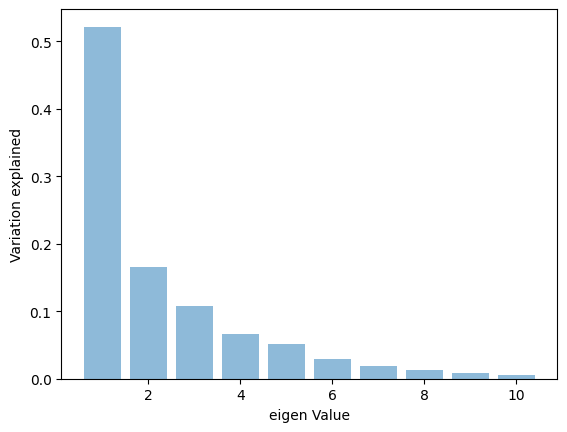

In [275]:
plt.bar(list(range(1,11)), pca.explained_variance_ratio_, alpha=0.5, align='center')
plt.ylabel('Variation explained')
plt.xlabel('eigen Value')
plt.show()

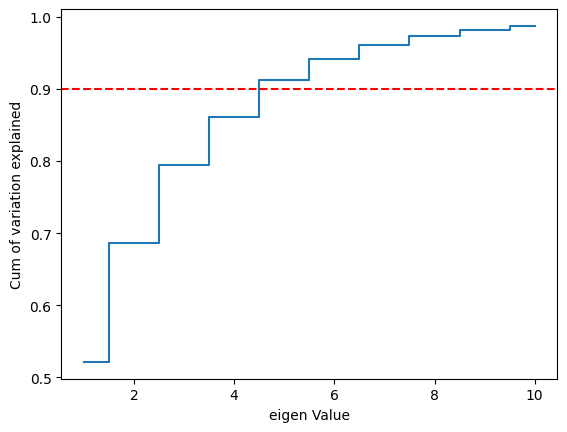

In [276]:
plt.step(list(range(1,11)), np.cumsum(pca.explained_variance_ratio_), where='mid')
plt.ylabel('Cum of variation explained')
plt.xlabel('eigen Value')
plt.axhline(y = 0.9, color = 'r', linestyle = '--')
plt.show()

3.F.

In [277]:
pca5 = PCA(n_components=5)
Xpca5_train = pca5.fit_transform(X_train_stand)
Xpca5_test = pca5.transform(X_test_stand)
print("PCA 5 explained variance ratio : ", pca5.explained_variance_ratio_)

PCA 5 explained variance ratio :  [0.5213842  0.16500433 0.10783751 0.06660436 0.05114075]


3.G.

In [278]:
#Create classifier object
svm_out_pca = SVC(kernel='rbf')
svm_out_pca.fit(Xpca5_train, y_train)

SVC()

3.H.

In [279]:
prediction=svm_out_pca.predict(Xpca5_train)

In [280]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [281]:
clf_report = pd.DataFrame(classification_report(y_train, prediction, output_dict=True))
print(clf_report)
print(f"\nAccuracy Score: {accuracy_score(y_train, prediction) * 100:.2f}%")
print("\n")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction)}\n")

                  bus         car         van  accuracy   macro avg  \
precision    0.812500    0.848276    0.689873  0.797297    0.783550   
recall       0.740506    0.854167    0.746575  0.797297    0.780416   
f1-score     0.774834    0.851211    0.717105  0.797297    0.781050   
support    158.000000  288.000000  146.000000  0.797297  592.000000   

           weighted avg  
precision      0.799662  
recall         0.797297  
f1-score       0.797753  
support      592.000000  

Accuracy Score: 79.73%


Confusion Matrix: 
 [[117  26  15]
 [  8 246  34]
 [ 19  18 109]]



In [282]:
prediction_test = svm_out_pca.predict(Xpca5_test)
clf_report = pd.DataFrame(classification_report(y_test, prediction_test, output_dict=True))
print(clf_report)
print(f"\nAccuracy Score: {accuracy_score(y_test, prediction_test) * 100:.2f}%")
print("\n")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, prediction_test)}\n")

                 bus         car        van  accuracy   macro avg  \
precision   0.777778    0.878788   0.544118  0.767717    0.733561   
recall      0.700000    0.822695   0.698113  0.767717    0.740269   
f1-score    0.736842    0.849817   0.611570  0.767717    0.732743   
support    60.000000  141.000000  53.000000  0.767717  254.000000   

           weighted avg  
precision      0.785094  
recall         0.767717  
f1-score       0.773417  
support      254.000000  

Accuracy Score: 76.77%


Confusion Matrix: 
 [[ 42   8  10]
 [  4 116  21]
 [  8   8  37]]



4.A.

In [283]:
new_model = SVC(kernel='poly', degree=2, gamma='auto', coef0=1, C=10)
new_model.fit(Xpca5_train, y_train)

SVC(C=10, coef0=1, degree=2, gamma='auto', kernel='poly')

4.B.

In [284]:
prediction_new_model = new_model.predict(Xpca5_train)
new_clf_report = pd.DataFrame(classification_report(y_train, prediction_new_model, output_dict=True))
print(new_clf_report)
print(f"\nAccuracy Score: {accuracy_score(y_train, prediction_new_model) * 100:.2f}%")
print("\n")
print(f"Confusion Matrix: \n {confusion_matrix(y_train, prediction_new_model)}\n")

                  bus         car         van  accuracy   macro avg  \
precision    0.789116    0.891608    0.698113  0.814189    0.792946   
recall       0.734177    0.885417    0.760274  0.814189    0.793289   
f1-score     0.760656    0.888502    0.727869  0.814189    0.792342   
support    158.000000  288.000000  146.000000  0.814189  592.000000   

           weighted avg  
precision      0.816534  
recall         0.814189  
f1-score       0.814765  
support      592.000000  

Accuracy Score: 81.42%


Confusion Matrix: 
 [[116  14  28]
 [ 13 255  20]
 [ 18  17 111]]



In [285]:
prediction_new_model_test = new_model.predict(Xpca5_test)
clf_report = pd.DataFrame(classification_report(y_test, prediction_new_model_test, output_dict=True))
print(clf_report)
print(f"\nAccuracy Score: {accuracy_score(y_test, prediction_new_model_test) * 100:.2f}%")
print("\n")
print(f"Confusion Matrix: \n {confusion_matrix(y_test, prediction_new_model_test)}\n")

                 bus         car        van  accuracy   macro avg  \
precision   0.661538    0.897810   0.576923  0.771654    0.712091   
recall      0.716667    0.872340   0.566038  0.771654    0.718348   
f1-score    0.688000    0.884892   0.571429  0.771654    0.714774   
support    60.000000  141.000000  53.000000  0.771654  254.000000   

           weighted avg  
precision      0.775041  
recall         0.771654  
f1-score       0.772974  
support      254.000000  

Accuracy Score: 77.17%


Confusion Matrix: 
 [[ 43   5  12]
 [  8 123  10]
 [ 14   9  30]]



4.C.

This code trains a SVM classifier using 2rd degree ploynomial kernel.
The hyperparameter coef0 controls how much the model is influenced by high degree ploynomials.

This has improved the accuracy on test data to 77.1%.

5.A.

PCA is dimensionality reduction technique
- There must be linearity in the data set, i.e. the variables combine in a linear manner to form the dataset. The variables exhibit relationships among themselves
- PCA assumes that the principal component with high variance must be paid attention and the PCs with lower variance are disregarded as noise
- All variables should be accessed on the same ratio level of measurement. 
- Extreme values that deviate from other data points in any dataset, which are also called outliers, should be less. More number of outliers will represent experimental errors and will degrade

5.B.

PCA is a great tool to analyze your data and extract two or three most important factors. It is great to spot the outliers and the trend

Advantages:
- PCA can be used as a data reduction technique.
- PCA can also be used to reduce the dimensionality of the data space in order to get insight on the inner structure of the data.
- It is helpful when dealing with large datasets

Limitations:
- It is not suitable for small data sets
- It does not find the important factors but selects them based on the values. So, it is difficult to find the important factors.
- It is difficult to compare the data with PCA
- It cannot find any non-linear relationships